In [ ]:
'''
For the deliveries.csv dataset, answer the specified questions with summarization and effective visuals.
1. Find and visualize the total runs scored by each team.
2. Identify and display the names of the top 10 highest-scoring batters with their total runs scored.
3. Find and visualize the top 10 bowlers with the most wickets.
4. Tabulate and visualize the total number of extras conceded by each team.
5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs.
6. Tabulate and visualize the top 5 bowlers who conceded the most extras.
7. Tabulate and visualize the most common dismissal type.
8. Find and display which of the top 3 overs has the highest run rate.
9. Analyze and visualize powerplay performance (first 6 overs).
10. Tabulate and visualize the top 5 batsmen with the most sixes and fours.
'''
# Week 8, Code 2
# Nityant Agarwal, CC, 240953418

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('deliveries.csv')
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


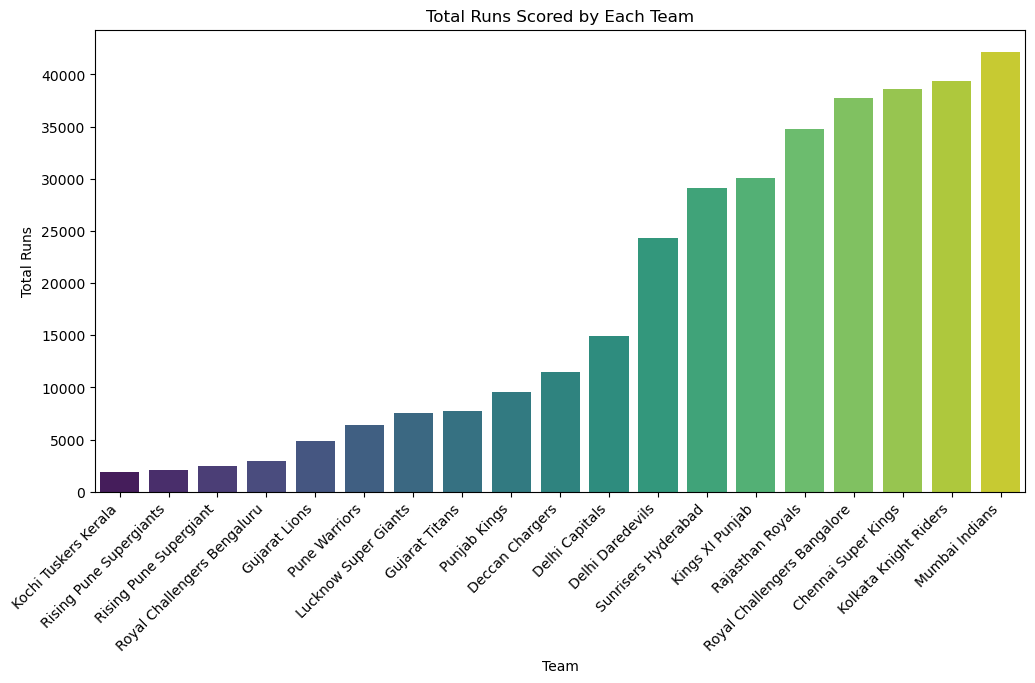

In [10]:
# 1. Find and visualize the total runs scored by each team.
total_runs_team = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(x=total_runs_team.index, y=total_runs_team.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.title("Total Runs Scored by Each Team")
plt.show()

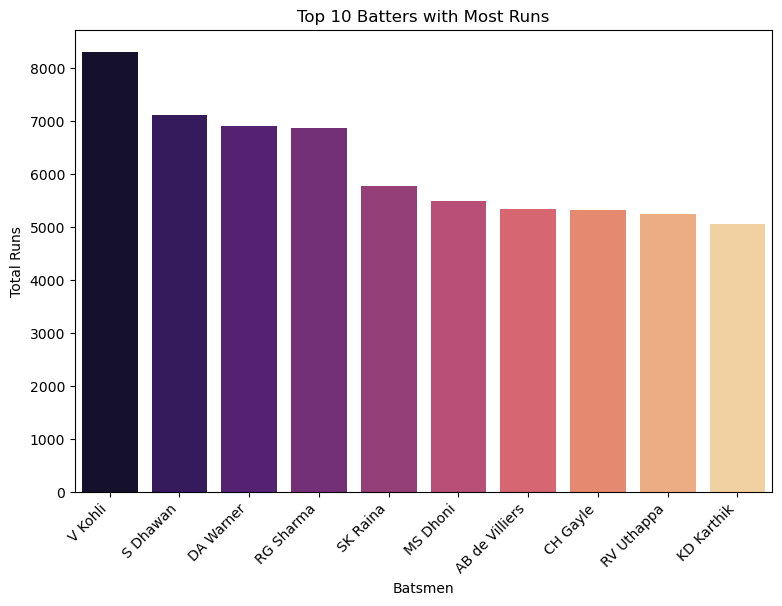

batter
V Kohli           8307
S Dhawan          7119
DA Warner         6910
RG Sharma         6884
SK Raina          5780
MS Dhoni          5505
AB de Villiers    5354
CH Gayle          5336
RV Uthappa        5246
KD Karthik        5066
Name: total_runs, dtype: int64


In [35]:
# 2. Identify and display the names of the top 10 highest-scoring batters with their total runs scored.
top_batters=df.groupby('batter')['total_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,6))
sns.barplot(x=top_batters.index, y=top_batters.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.title("Top 10 Batters with Most Runs")
plt.show()
print(top_batters)

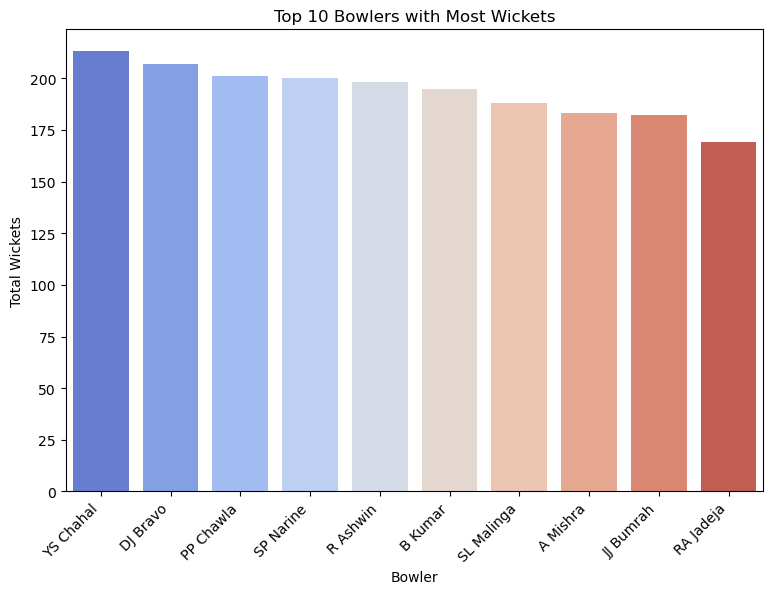

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64


In [29]:
# 3. Find and visualize the top 10 bowlers with the most wickets.
top_bowlers = df[df['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.title("Top 10 Bowlers with Most Wickets")
plt.show()
print(top_bowlers)

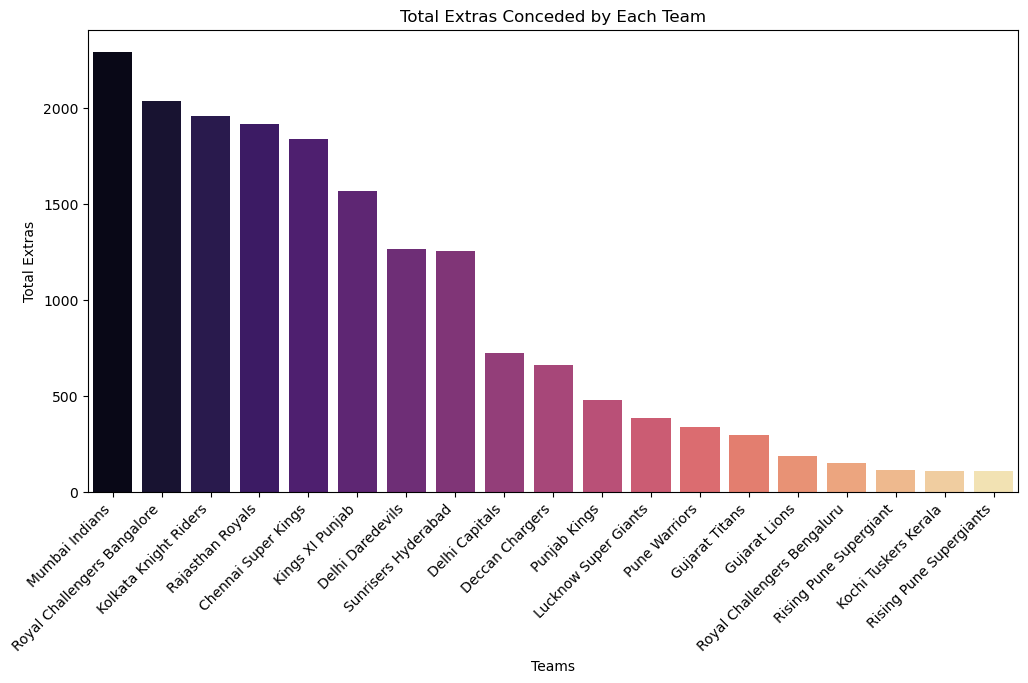

bowling_team
Mumbai Indians                 2295
Royal Challengers Bangalore    2040
Kolkata Knight Riders          1957
Rajasthan Royals               1917
Chennai Super Kings            1842
Kings XI Punjab                1571
Delhi Daredevils               1268
Sunrisers Hyderabad            1254
Delhi Capitals                  725
Deccan Chargers                 659
Punjab Kings                    480
Lucknow Super Giants            386
Pune Warriors                   335
Gujarat Titans                  295
Gujarat Lions                   188
Royal Challengers Bengaluru     151
Rising Pune Supergiant          111
Kochi Tuskers Kerala            110
Rising Pune Supergiants         108
Name: extra_runs, dtype: int64


In [23]:
# 4. Tabulate and visualize the total number of extras conceded by each team.
total_extras = df.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=total_extras.index, y=total_extras.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Teams")
plt.ylabel("Total Extras")
plt.title("Total Extras Conceded by Each Team")
plt.show()
print(total_extras)

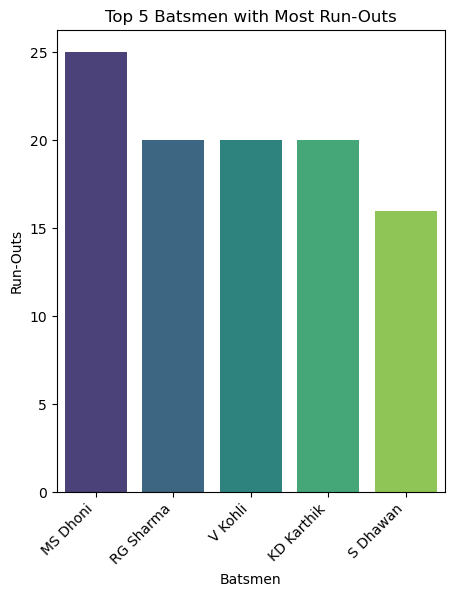

MS Dhoni      25
RG Sharma     20
V Kohli       20
KD Karthik    20
S Dhawan      16
Name: batter, dtype: int64


In [41]:
# 5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs.
top_runouts = df[df['dismissal_kind'] == 'run out']['batter'].value_counts().head(5)
plt.figure(figsize=(5,6))
sns.barplot(x=top_runouts.index, y=top_runouts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Batsmen")
plt.ylabel("Run-Outs")
plt.title("Top 5 Batsmen with Most Run-Outs")
plt.show()
print(top_runouts)

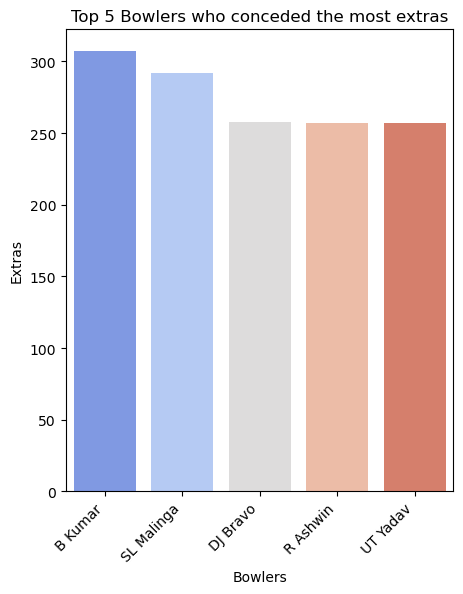

bowler
B Kumar       307
SL Malinga    292
DJ Bravo      258
R Ashwin      257
UT Yadav      257
Name: extra_runs, dtype: int64


In [44]:
# 6. Tabulate and visualize the top 5 bowlers who conceded the most extras.
top_extra_bowlers = df.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(5,6))
sns.barplot(x=top_extra_bowlers.index, y=top_extra_bowlers.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Bowlers")
plt.ylabel("Extras")
plt.title("Top 5 Bowlers who conceded the most extras")
plt.show()
print(top_extra_bowlers)

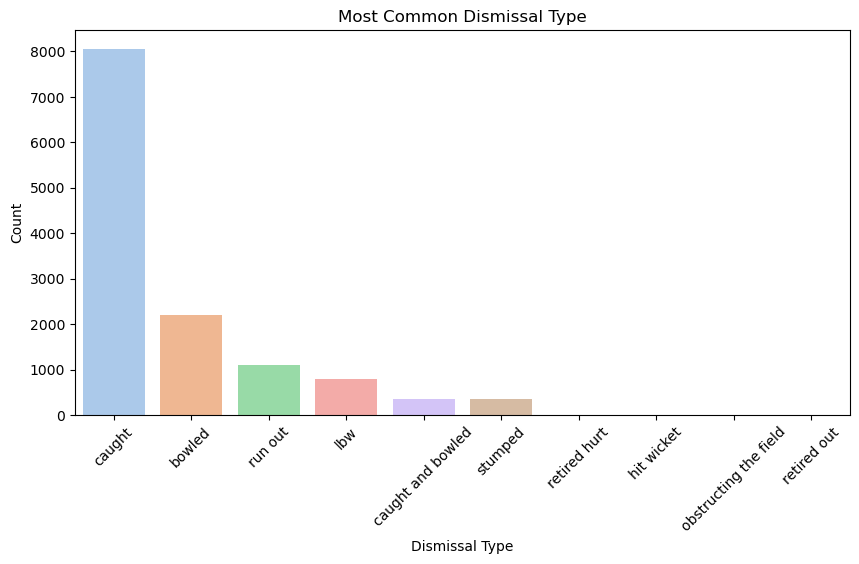

caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: dismissal_kind, dtype: int64


In [45]:
# 7. Tabulate and visualize the most common dismissal type.
dismissal_counts = df['dismissal_kind'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette='pastel')
plt.xticks(rotation=45)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Most Common Dismissal Type")
plt.show()
print(dismissal_counts)

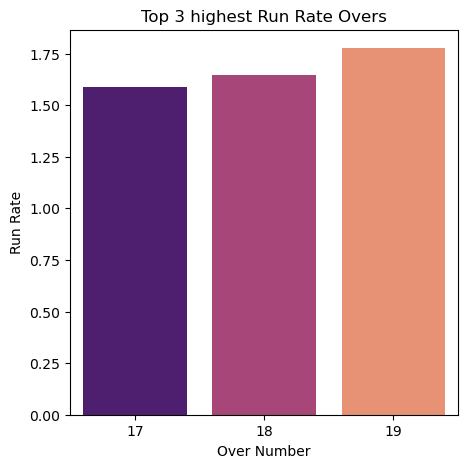

over
19    1.776855
18    1.646896
17    1.587839
dtype: float64


In [54]:
# 8. Find and display which of the top 3 overs has the highest run rate.
top_overs = df.groupby('over')['total_runs'].sum() / df.groupby('over')['ball'].count()
top_3_overs = top_overs.sort_values(ascending=False).head(3)
plt.figure(figsize=(5,5))
sns.barplot(x=top_3_overs.index, y=top_3_overs.values, palette='magma')
plt.xlabel("Over Number")
plt.ylabel("Run Rate")
plt.title("Top 3 highest Run Rate Overs")
plt.show()
print(top_3_overs)

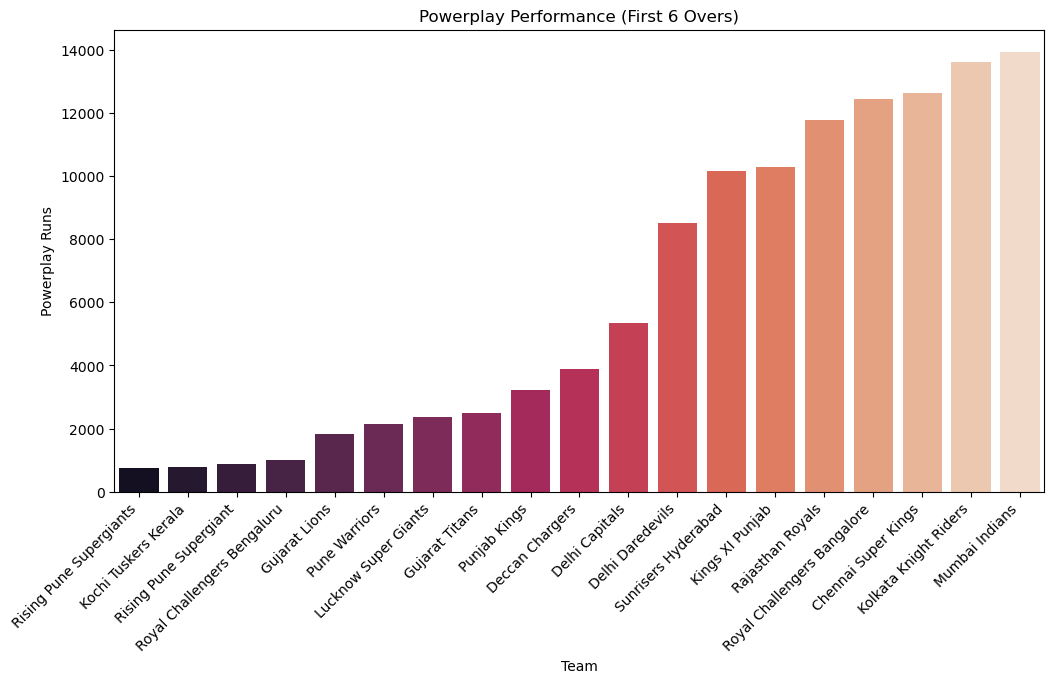

In [55]:
# 9. Analyze and visualize powerplay performance (first 6 overs).
powerplay_runs = df[df['over'] <= 6].groupby('batting_team')['total_runs'].sum().sort_values(ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(x=powerplay_runs.index, y=powerplay_runs.values, palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Team")
plt.ylabel("Powerplay Runs")
plt.title("Powerplay Performance (First 6 Overs)")
plt.show()

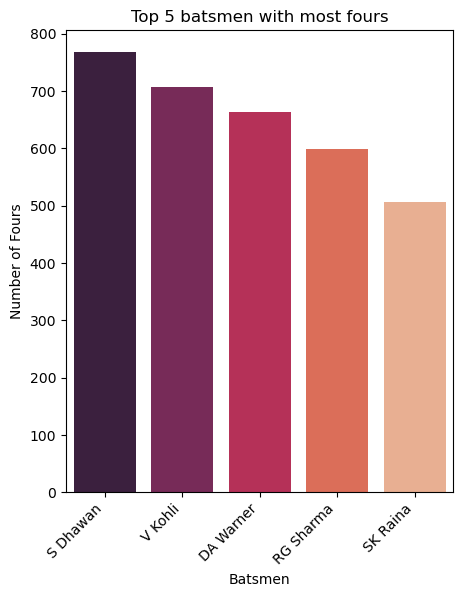

Top 5 batsmen with most fours:
S Dhawan     768
V Kohli      708
DA Warner    663
RG Sharma    599
SK Raina     506
Name: batter, dtype: int64


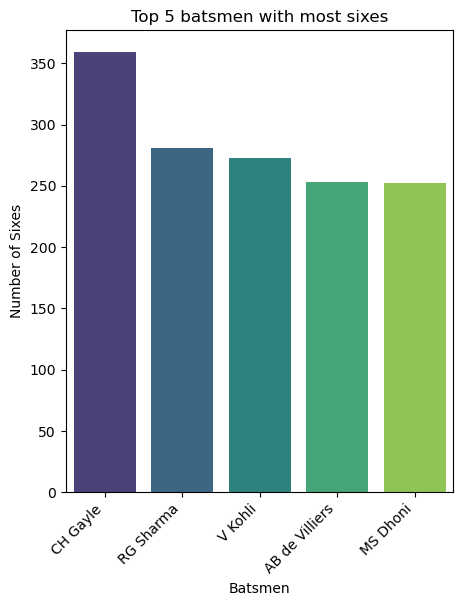

Top 5 batsmen with most sixes:
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
Name: batter, dtype: int64


In [59]:
# 10. Tabulate and visualize the top 5 batsmen with the most sixes and fours.
top_fours = df[df['batsman_runs'] == 4]['batter'].value_counts().head(5)
top_sixes = df[df['batsman_runs'] == 6]['batter'].value_counts().head(5)
plt.figure(figsize=(5,6))
sns.barplot(x=top_fours.index, y=top_fours.values, palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Batsmen")
plt.ylabel("Number of Fours")
plt.title("Top 5 batsmen with most fours")
plt.show()
print("Top 5 batsmen with most fours:")
print(top_fours)
plt.figure(figsize=(5,6))
sns.barplot(x=top_sixes.index, y=top_sixes.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Batsmen")
plt.ylabel("Number of Sixes")
plt.title("Top 5 batsmen with most sixes")
plt.show()
print("Top 5 batsmen with most sixes:")
print(top_sixes)